In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF DONE

In [5]:
env='Hopper-v4'
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER-DDPG"
print(df_comper.shape)

(11394, 17)


In [6]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
print(df_ddpg.shape)

(19036, 17)


In [7]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Hopper-v4,25-09-2023 09:47:52,59,0,59,0.002933,1,60,True,86.680591,86.680591,86.680591,86.680591,86.680591,COMPER-DDPG
1,1,2,Hopper-v4,25-09-2023 09:50:05,115,0,115,0.005716,2,57,True,105.386270,96.033430,96.033430,96.033430,96.033430,COMPER-DDPG
2,1,3,Hopper-v4,25-09-2023 09:52:20,168,0,168,0.008350,3,54,True,89.612832,93.893231,93.893231,93.893231,93.893231,COMPER-DDPG
3,1,4,Hopper-v4,25-09-2023 09:53:43,200,0,200,0.009941,4,33,False,55.340243,84.254984,84.254984,84.254984,84.254984,COMPER-DDPG
4,1,5,Hopper-v4,25-09-2023 09:53:48,202,0,202,0.010040,4,35,True,58.396770,79.083341,79.083341,79.083341,79.083341,COMPER-DDPG


In [8]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Hopper-v4,04-10-2023 04:10:47,66,67,0,0.003280,1,67,True,86.356344,86.356344,86.356344,86.356344,86.356344,DDPG
1,1,2,Hopper-v4,04-10-2023 04:10:53,113,114,0,0.005617,2,48,True,81.375474,83.865909,83.865909,83.865909,83.865909,DDPG
2,1,3,Hopper-v4,04-10-2023 04:10:54,120,121,0,0.005964,3,8,True,3.689655,57.140491,57.140491,57.140491,57.140491,DDPG
3,1,4,Hopper-v4,04-10-2023 04:10:55,127,128,0,0.006312,4,8,True,3.705186,43.781665,43.781665,43.781665,43.781665,DDPG
4,1,5,Hopper-v4,04-10-2023 04:10:56,134,135,0,0.006660,5,8,True,3.782121,35.781756,35.781756,35.781756,35.781756,DDPG


In [9]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Hopper-v4,25-09-2023 09:47:52,59,0,59,0.002933,1,60,True,86.680591,86.680591,86.680591,86.680591,86.680591,COMPER-DDPG
1,1,2,Hopper-v4,25-09-2023 09:50:05,115,0,115,0.005716,2,57,True,105.386270,96.033430,96.033430,96.033430,96.033430,COMPER-DDPG
2,1,3,Hopper-v4,25-09-2023 09:52:20,168,0,168,0.008350,3,54,True,89.612832,93.893231,93.893231,93.893231,93.893231,COMPER-DDPG
3,1,4,Hopper-v4,25-09-2023 09:53:43,200,0,200,0.009941,4,33,False,55.340243,84.254984,84.254984,84.254984,84.254984,COMPER-DDPG
4,1,5,Hopper-v4,25-09-2023 09:53:48,202,0,202,0.010040,4,35,True,58.396770,79.083341,79.083341,79.083341,79.083341,COMPER-DDPG


In [10]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
4676,5,4677,Hopper-v4,04-10-2023 14:33:03,49978,49867,0,0.999,4443,8,True,4.188887,13.806324,4.655494,4.041371,4.281275,DDPG
4677,5,4678,Hopper-v4,04-10-2023 14:33:05,49985,49874,0,0.999,4444,8,True,4.219903,13.804275,4.640064,4.043964,4.155398,DDPG
4678,5,4679,Hopper-v4,04-10-2023 14:33:06,49992,49881,0,0.999,4445,8,True,4.254085,13.802234,4.613485,4.046388,4.093917,DDPG
4679,5,4680,Hopper-v4,04-10-2023 14:33:07,49999,49888,0,0.999,4446,8,True,4.300753,13.800204,4.584645,4.050016,4.006930,DDPG
4680,5,4681,Hopper-v4,04-10-2023 14:33:07,50000,49889,0,0.999,4447,2,True,0.946108,13.797458,4.520955,3.988122,3.692179,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

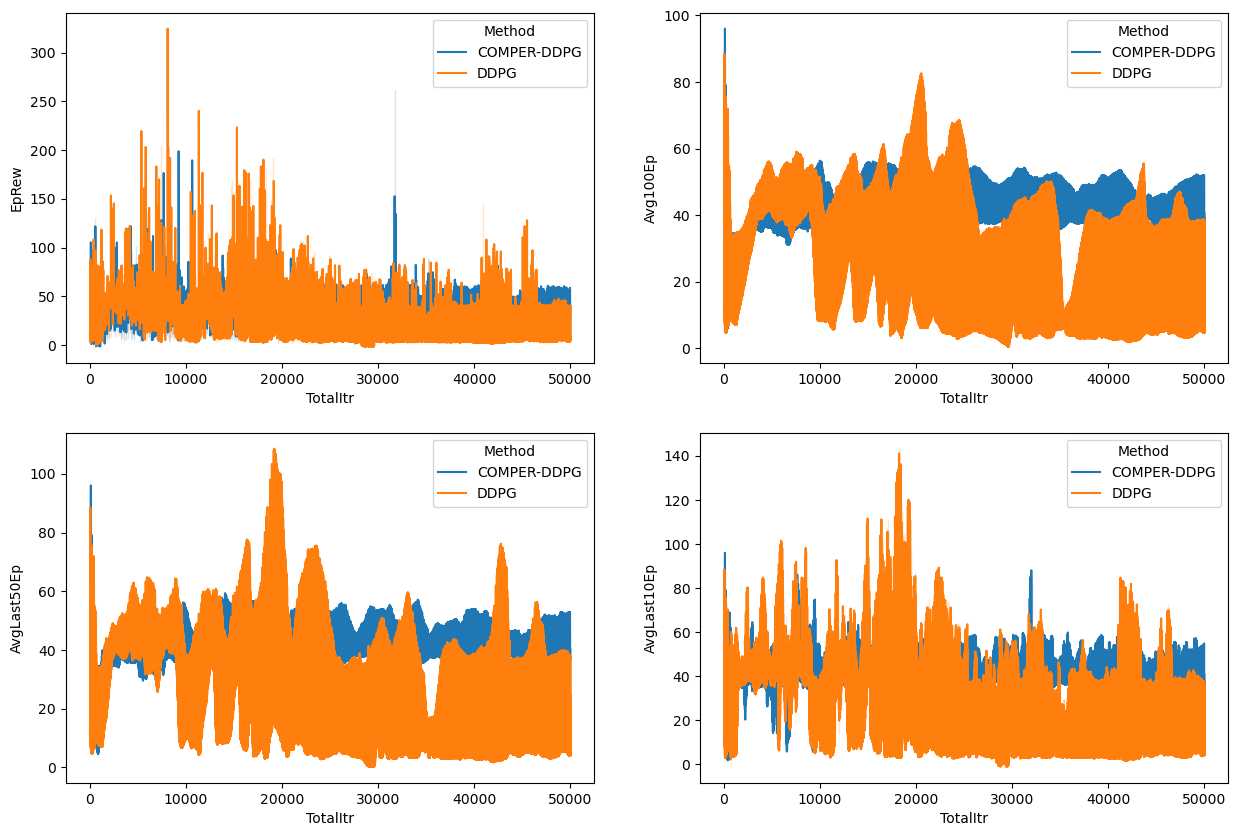

In [11]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])


In [12]:
path ='COMPER_DDPG/data_using_done/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER-DDPG"
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,25-09-2023 13:19:37,Hopper-v4,5000,6.486307,COMPER-DDPG
1,1,25-09-2023 16:56:39,Hopper-v4,10000,6.441560,COMPER-DDPG
2,1,25-09-2023 20:34:53,Hopper-v4,15000,6.431958,COMPER-DDPG
3,1,26-09-2023 00:12:47,Hopper-v4,20000,6.497798,COMPER-DDPG
4,1,26-09-2023 03:51:32,Hopper-v4,25000,6.488228,COMPER-DDPG


In [13]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,6.370542
std,1.428571,14507.211437,0.368101
min,1.000000,5000.000000,4.636773
25%,2.000000,15000.000000,6.411029
50%,3.000000,27500.000000,6.440084
75%,4.000000,40000.000000,6.486812
max,5.000000,50000.000000,6.643710


In [14]:
path ='DPPG/data_using_done/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,04-10-2023 04:20:26,Hopper-v4,5000,6.394962,DDPG
1,1,04-10-2023 04:30:41,Hopper-v4,10000,6.494615,DDPG
2,1,04-10-2023 04:41:33,Hopper-v4,15000,6.483611,DDPG
3,1,04-10-2023 04:53:02,Hopper-v4,20000,6.163105,DDPG
4,1,04-10-2023 05:05:04,Hopper-v4,25000,6.388219,DDPG


In [15]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,5.062366
std,1.428571,14507.211437,1.494747
min,1.000000,5000.000000,2.289988
25%,2.000000,15000.000000,3.752267
50%,3.000000,27500.000000,5.581239
75%,4.000000,40000.000000,6.376379
max,5.000000,50000.000000,6.531706


In [16]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

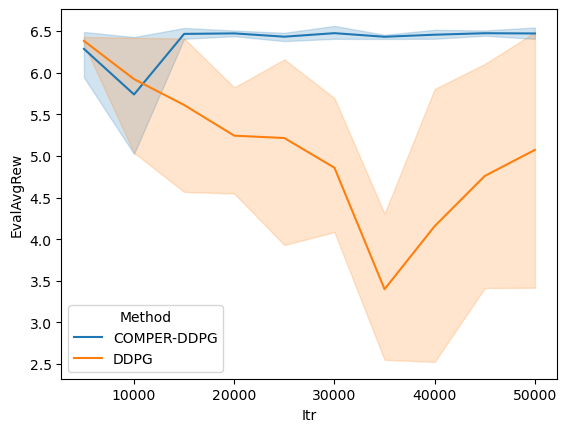

In [17]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [18]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,1377,40.201005,COMPER-DDPG,18.384031
100,1399,39.028051,COMPER-DDPG,17.907506
101,1400,1.016158,COMPER-DDPG,16.863805
102,1422,40.316259,COMPER-DDPG,16.370839
103,1445,40.049428,COMPER-DDPG,16.217931


In [19]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,2430,65.551900,DDPG,39.696073
100,2506,145.321659,DDPG,40.285726
101,2531,44.272141,DDPG,39.914693
102,2562,55.541601,DDPG,40.433212
103,2584,38.611536,DDPG,40.782276


In [20]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,1377,40.201005,COMPER-DDPG,18.384031
100,1399,39.028051,COMPER-DDPG,17.907506
101,1400,1.016158,COMPER-DDPG,16.863805
102,1422,40.316259,COMPER-DDPG,16.370839
103,1445,40.049428,COMPER-DDPG,16.217931


In [21]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
4676,49978,4.188887,DDPG,4.655494
4677,49985,4.219903,DDPG,4.640064
4678,49992,4.254085,DDPG,4.613485
4679,49999,4.300753,DDPG,4.584645
4680,50000,0.946108,DDPG,4.520955


<Axes: xlabel='TotalItr', ylabel='EpRewRolling'>

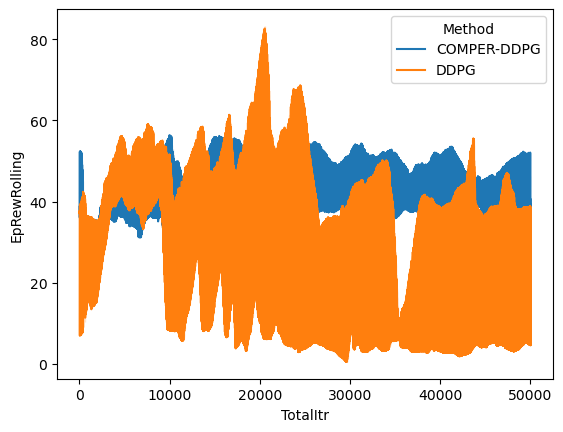

In [22]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')

In [23]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,6.441560,COMPER-DDPG,6.463934
2,15000,6.431958,COMPER-DDPG,6.436759
3,20000,6.497798,COMPER-DDPG,6.464878
4,25000,6.488228,COMPER-DDPG,6.493013
5,30000,6.435348,COMPER-DDPG,6.461788


In [24]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,6.494615,DDPG,6.444789
2,15000,6.483611,DDPG,6.489113
3,20000,6.163105,DDPG,6.323358
4,25000,6.388219,DDPG,6.275662
5,30000,4.282818,DDPG,5.335518


<Axes: xlabel='Int', ylabel='EpRewRolling'>

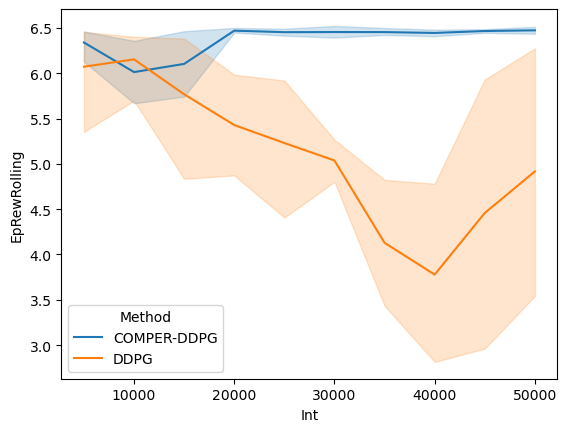

In [25]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')

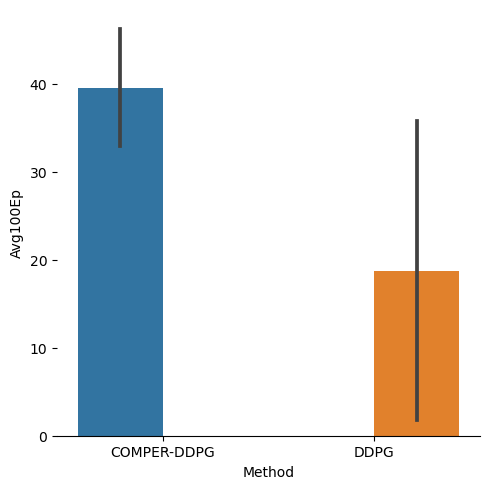

In [26]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)

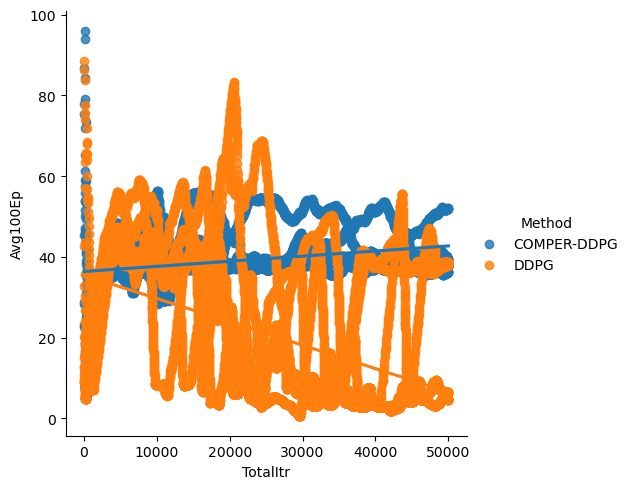

In [27]:
g = sns.lmplot(
    data=df,
    x="TotalItr", y="Avg100Ep", hue="Method",
    height=5
)